# Difference-in-differences (DiD)

Difference-in-differences (DiD) is a statistical technique used in econometrics to estimate the causal effect of a treatment on a time series. For example, it might be used to **evaluate the effect of a new policy** on the electricity prices, in a specific region. 

Let us suppose we collected some data from electricity prices over time, and we know that at a certain point in time a new policy was introduced. Let us also suppose that we observed a change in the trend, and we would like to attribute that change to the newly introduced policy. To be sure that the change in price time series is indeed due to the new policy, we would need to know the **counterfactual**. The counterfactual represents what would have happened to the prices had the new policy not been introduced. Then, by comparing the prices observed under the new policy with what the prices would have been without the policy, we would finally be able to say that the prices changed because of the policy. Without the counterfactual, we might not be able to accurately determine the true effect of the policy because of:
- Other influencing factors: in the real world, multiple factors can influence electricity prices simultaneously. These could include changes in fuel prices, demand fluctuations, economic conditions, and other regulatory changes. Without a counterfactual, it is difficult to isolate the impact of the specific policy from these other variables.
- Temporal trends: electricity prices may follow certain trends over time regardless of the policy intervention. For instance, prices might be declining due to improvements in technology or increasing due to rising demand. The counterfactual helps to control for these underlying trends, providing a clearer picture of what the prices would have looked like in the absence of the policy.

Unfortunately, in observational data, we cannot observe the counterfactual, since we only have access to what has happened under the new policy. DiD tries to tackle this problem by comparing the changes in the prices over time before a treatment group and a control group, where:
- The **treatment group** is, for example, the data collected from a region where the new policy was introduced.
- The **control group** might refer to another region, where the new policy was not introduced.

While doing so, DiD relies a crucial assumption known as the **parallel trends assumption**. This assumption asserts that the treatment and control groups would have followed the same trajectory over time in the absence of the treatment. Using the parallel trends assumption, we can use the change of the prices of the control group as a counterfactual for the treatment group in the absence of the treatment. n simple terms, DiD means that we are looking at:

\begin{align}
    \text{DiD} = &(\text{price in treatment group before policy} - \text{price in treatment group after policy}) \\
    & - (\text{price in control group before policy} - \text{price in control group after policy})
\end{align}

In other words, we are checking if there is a **difference between the two individual differences**. The first difference measures the change in prices for the treatment group before and after the policy, while the second difference measures the change in prices for the control group before and after the policy. By subtracting these two differences, we can isolate the effect of the policy from other factors that might influence electricity prices over time.

In practice, a common approach to DiD is to specify a linear regression model for the outcome of interest (in this case the price) as in:

\begin{equation}
    y = \alpha + \beta \, \text{group} + \gamma \, \text{policy} + \delta \, (\text{group} \times \text{policy}) + \varepsilon
\end{equation}

where:
- $\alpha$, $\beta$, $\gamma$, and $\delta$ are the regression coefficients.
- group is a dummy variable that indicates whether the observation refers to the treatment group (1) or control group (0).
- policy is a control variable that indicates if we are in the period post policy (1) or before policy (0).
- $\text{group} \times \text{policy}$ is an interaction term to count for the DiD causal effect.

The model can be estimated with traditional methods such as ordinary least squares (OLS). DiD can also be extended to nonlinear or semi-parametric settings.





Difference in Differences (DiD) is a quasi-experimental design used in causal inference to estimate the treatment effect of a policy or intervention by comparing the changes in outcomes over time. DiD is particularly useful when randomized control trials are not feasible and is widely used in social sciences and economics to study the impact of policy changes, regulations, and other interventions.

**Parallel trends sssumption**: for DiD to provide a valid estimate of the treatment effect, the \textbf{parallel trends assumption} must hold. This assumption states that in the absence of the treatment, the trend in the outcome for the treatment group would have remained the same over time. Mathematically, if $Y_t$ denotes the outcome at time $t$, and $\tau$ is a binary indicator for the post-treatment period, the parallel trends assumption can be written as:

\begin{equation}
\mathbb{E}[Y_t(0) - Y_{t-1}(0)] = \mathbb{E}[Y_t(1) - Y_{t-1}(1)]
\end{equation}

where $Y_t(0)$ is the potential outcome without treatment and $Y_t(1)$ is the potential outcome with treatment.

\subsubsection{Estimation}

The DiD estimator can be represented as:

\begin{equation}
\text{DiD} = \mathbb{E}[Y_t | \tau = 1] - \mathbb{E}[Y_{t-1} | \tau = 1]
\end{equation}

This can be implemented using a regression model:

\begin{equation}
Y_t = \alpha + \beta \tau + \epsilon_t
\end{equation}

where $\beta$ represents the DiD estimate of the treatment effect.

**Applicability without a control group**: without a control group, the DiD approach relies on the assumption that any changes in the outcome variable are due to the treatment and not due to other external factors. This assumption is more stringent because we lack a comparative baseline to control for external trends and shocks. Thus, the validity of the results heavily depends on the robustness of the parallel trends assumption.


**Example: balancing costs and policy implementation**. Let's consider an **example** where we have data on balancing costs for electricity markets over time, and at a certain point, a policy is implemented to reduce these costs. We will use the DiD method to determine whether the policy had an impact on balancing costs.

First, we simulate the data to demonstrate the approach.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Simulate data
n = 1000  # number of observations
regions = np.random.choice(['Region_A', 'Region_B'], size=n)  # two regions
policy = (regions == 'Region_A').astype(int)  # policy implemented in Region_A
time = np.random.choice(['Before', 'After'], size=n)  # two time periods
post = (time == 'After').astype(int)  # after policy implementation

# Simulate electricity prices
true_effect = -5  # policy reduces prices by 5 units
base_price = 50 + np.random.normal(0, 5, n)
price_change = post * (policy * true_effect + np.random.normal(0, 2, n))
electricity_prices = base_price + price_change

# Create DataFrame
data = pd.DataFrame({
    'Region': regions,
    'Time': time,
    'Post': post,
    'Policy': policy,
    'ElectricityPrices': electricity_prices
})

data.head()

,Region,Time,Post,Policy,ElectricityPrices
0,Region_A,After,1,1,43.075870
1,Region_B,Before,0,0,43.323278
2,Region_A,Before,0,1,51.900989
3,Region_A,Before,0,1,53.052929
4,Region_A,Before,0,1,52.798952


In [2]:
# Create interaction term for DiD
data['DiD'] = data['Post'] * data['Policy']

# Fit the DiD model
model = sm.OLS(data['ElectricityPrices'], sm.add_constant(data[['Post', 'Policy', 'DiD']])).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      ElectricityPrices   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     68.00
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           5.24e-40
Time:                        14:31:01   Log-Likelihood:                -3053.0
No. Observations:                1000   AIC:                             6114.
Df Residuals:                     996   BIC:                             6134.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.5899      0.314    160.980      0.0

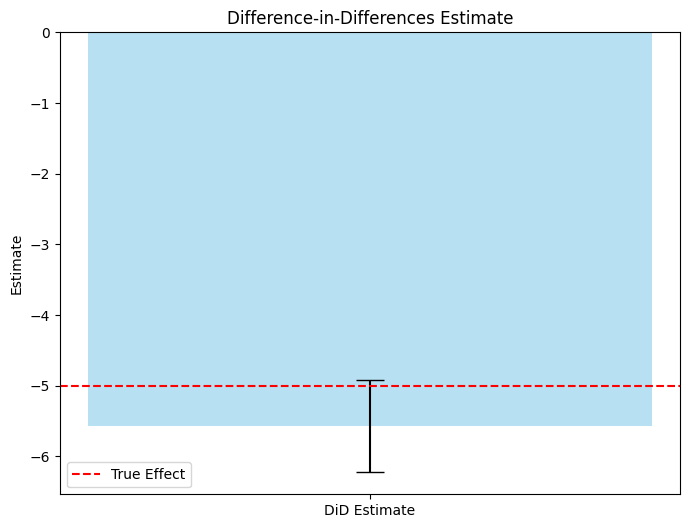

In [3]:
# Extract coefficients
coef = model.params['DiD']
se = model.bse['DiD']

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(['DiD Estimate'], [coef], yerr=[se], capsize=10, color='skyblue', alpha=0.6)
plt.axhline(y=true_effect, color='red', linestyle='--', label='True Effect')
plt.ylabel('Estimate')
plt.title('Difference-in-Differences Estimate')
plt.legend()
plt.show()